In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw5.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 5: Putting it all together 
### Associated lectures: All material till lecture 13 

**Due date: [Monday, Mar 10, 11:59 pm](https://github.com/UBC-CS/cpsc330-2024W2?tab=readme-ov-file#deliverable-due-dates-tentative)**

## Table of contents
0. [Submission instructions](#si)
1. [Understanding the problem](#1)
2. [Data splitting](#2)
3. [EDA](#3)
4. [Feature engineering](#4)
5. [Preprocessing and transformations](#5) 
6. [Baseline model](#6)
7. [Linear models](#7)
8. [Different models](#8)
9. [Feature selection](#9)
10. [Hyperparameter optimization](#10)
11. [Interpretation and feature importances](#11) 
12. [Results on the test set](#12)
13. [Summary of the results](#13)
14. [Your takeaway from the course](#15)

<div class="alert alert-info">

## Submission instructions
<hr>
rubric={points:4}

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).
- If you would like to use late tokens for the homework, all group members must have the necessary late tokens available. Please note that the late tokens will be counted for all members of the group.   


Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2024W2/blob/master/docs/homework_instructions.md). 

1. Before submitting the assignment, run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Follow the [CPSC 330 homework instructions](https://ubc-cs.github.io/cpsc330-2024W2/docs/homework_instructions.html), which include information on how to do your assignment and how to submit your assignment.
4. Upload your solution on Gradescope. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope.


_Note: The assignments will get gradually more open-ended as we progress through the course. In many cases, there won't be a single correct solution. Sometimes you will have to make your own choices and your own decisions (for example, on what parameter values to use when they are not explicitly provided in the instructions). Use your own judgment in such cases and justify your choices, if necessary._

</div>

**Test Recall: 0.373**

<!-- BEGIN QUESTION -->

## Imports

<div class="alert alert-warning">
    
Imports
    
</div>

_Points:_ 0

In [2]:
from hashlib import sha1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import shap

import os
import string
import sys
from collections import deque

plt.rcParams["font.size"] = 16

sys.path.append(os.path.join(os.path.abspath(".."), "code"))
import seaborn as sns
from sklearn import datasets
from sklearn.compose import make_column_transformer
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.svm import SVC, SVR

from sklearn.feature_selection import RFECV


DATA_DIR = os.path.join(os.path.abspath(".."), "data/")
%matplotlib inline

<!-- END QUESTION -->

## Introduction <a name="in"></a>

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (15-20 hours???) is a good guideline for this project . Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>
rubric={points:3}

In this mini project, you have the option to choose on which dataset you will be working on. The tasks you will need to carry on will be similar, independently of your choice.

### Option 1
You can choose to work on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 


### Option 2
You can choose to work on a regression problem using a [dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data) of New York City Airbnb listings from 2019. As usual, you'll need to start by downloading the dataset, then you will try to predict `reviews_per_month`, as a proxy for the popularity of the listing. Airbnb could use this sort of model to predict how popular future listings might be before they are posted, perhaps to help guide hosts create more appealing listings. In reality they might instead use something like vacancy rate or average rating as their target, but we do not have that available here.

> Note there is an updated version of this dataset with more features available [here](http://insideairbnb.com/). The features were are using in `listings.csv.gz` for the New York city datasets. You will also see some other files like `reviews.csv.gz`. For your own interest you may want to explore the expanded dataset and try your analysis there. However, please submit your results on the dataset obtained from Kaggle.


**Your tasks:**

1. Spend some time understanding the options and pick the one you find more interesting (it may help spending some time looking at the documentation available on Kaggle for each dataset).
2. After making your choice, focus on understanding the problem and what each feature means, again using the documentation on the dataset page on Kaggle. Write a few sentences on your initial thoughts on the problem and the dataset. 
3. Download the dataset and read it as a pandas dataframe. 

<div class="alert alert-warning">
    
Solution_1
    
</div>

_Points:_ 3

This dataset tackles a real-world problem that banks and lenders deal with every day - predicting whether a credit card holder will miss their payment next month. It includes details about customers, like their age, education, and marital status, along with their past payment history and bill amounts. Since financial behavior is complex, some features, like past payments, will likely be strong indicators of whether someone defaults. A big challenge here could be class imbalance. Most people probably don’t default, so we’ll need to account for that when building models. Overall, this is an interesting and practical problem that combines finance and machine learning, making it a great opportunity to apply different techniques and see what works best. We will use classification to tackle this problem.

In [3]:
credit_card_df = pd.read_csv("data/UCI_Credit_card.csv")
credit_card_df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>
rubric={points:2}

**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=123`.

> If your computer cannot handle training on 70% training data, make the test split bigger.  

<div class="alert alert-warning">
    
Solution_2
    
</div>

_Points:_ 2

In [4]:
# Splitting the data into training (70%) and testing (30%) sets
train_df, test_df = train_test_split(credit_card_df, test_size=0.3, random_state=123)

# Display the shapes of the dataframes
print(train_df.shape, test_df.shape)

(21000, 25) (9000, 25)


In [5]:
train_df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
16395,16396,320000.0,2,1,2,36,0,0,0,0,...,19370.0,10155.0,3788.0,5000.0,5018.0,1000.0,3000.0,0.0,7013.0,0
21448,21449,440000.0,2,1,2,30,-1,-1,-1,0,...,171244.0,150897.0,117870.0,612.0,87426.0,130007.0,3018.0,15000.0,51663.0,0
20034,20035,160000.0,2,3,1,44,-2,-2,-2,-2,...,-18.0,-18.0,-18.0,0.0,0.0,0.0,0.0,0.0,0.0,0
25755,25756,120000.0,2,2,1,30,0,0,0,0,...,103058.0,71095.0,47379.0,3706.0,5502.0,4204.0,3017.0,2005.0,1702.0,0
1438,1439,50000.0,1,2,2,54,1,2,0,0,...,27585.0,27910.0,27380.0,0.0,1400.0,1200.0,1500.0,1000.0,1500.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28636,28637,380000.0,2,2,1,37,0,0,0,0,...,14291.0,15949.0,15556.0,1204.0,1300.0,1242.0,1900.0,0.0,3000.0,0
17730,17731,360000.0,2,1,1,54,1,-2,-2,-1,...,2580.0,2580.0,6941.0,0.0,0.0,2580.0,0.0,6941.0,0.0,0
28030,28031,50000.0,2,3,1,29,0,0,0,0,...,39420.0,8824.0,9009.0,2002.0,2000.0,1530.0,1000.0,327.0,329.0,1
15725,15726,30000.0,2,2,2,21,0,0,0,0,...,30841.0,29434.0,16565.0,2000.0,2000.0,2000.0,1765.0,331.0,0.0,0


In [6]:
test_df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
25665,25666,40000.0,2,2,2,26,-1,0,0,0,...,0.0,44024.0,18697.0,1300.0,1000.0,0.0,22373.0,680.0,10000.0,0
16464,16465,80000.0,2,3,1,59,0,0,0,0,...,50875.0,50372.0,49470.0,3212.0,2106.0,2000.0,1603.0,1903.0,2006.0,0
22386,22387,170000.0,2,1,2,30,2,2,2,2,...,157577.0,168094.0,170922.0,6800.0,6500.0,0.0,13000.0,5500.0,1000.0,1
10149,10150,200000.0,2,2,1,41,-2,-2,-2,-2,...,0.0,0.0,0.0,742.0,0.0,0.0,0.0,0.0,0.0,1
8729,8730,50000.0,1,2,1,43,0,0,0,0,...,9225.0,9417.0,9617.0,1140.0,1150.0,331.0,341.0,356.0,330.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17548,17549,60000.0,2,2,1,48,0,0,0,0,...,51808.0,16941.0,17295.0,2000.0,2100.0,1400.0,600.0,1000.0,1000.0,1
11459,11460,310000.0,1,2,1,43,-1,-1,-1,-1,...,2004.0,2503.0,814.0,2691.0,2060.0,2018.0,2505.0,816.0,3052.0,0
6608,6609,10000.0,2,2,2,22,0,0,0,0,...,8861.0,10104.0,9803.0,1284.0,1283.0,1000.0,1535.0,0.0,1000.0,0
2414,2415,30000.0,1,2,1,38,1,-1,-1,-1,...,2713.0,0.0,0.0,2281.0,3666.0,2713.0,0.0,0.0,0.0,1


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

<div class="alert alert-warning">
    
Solution_3
    
</div>

_Points:_ 10

#### **Summary Statistics**

Let's start the EDA. First we will use the `describe()` function to get summary statistics on the training set, including counts, quartiles, mean, and standard deviations.

In [7]:
summary_stats = train_df.describe()
summary_stats

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,...,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,14962.348238,167880.651429,1.600762,1.852143,1.554000,35.500810,-0.015429,-0.137095,-0.171619,-0.225238,...,43486.610905,40428.518333,38767.202667,5673.585143,5.895027e+03,5311.432286,4774.021381,4751.850095,5237.762190,0.223238
std,8650.734050,130202.682167,0.489753,0.792961,0.521675,9.212644,1.120465,1.194506,1.196123,1.168556,...,64843.303993,61187.200817,59587.689549,17033.241454,2.180143e+04,18377.997079,15434.136142,15228.193125,18116.846563,0.416427
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-50616.000000,-61372.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7498.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2293.750000,1739.500000,1215.750000,1000.000000,8.200000e+02,390.000000,266.000000,234.000000,110.750000,0.000000
50%,14960.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19102.500000,18083.000000,16854.500000,2100.000000,2.007000e+03,1809.500000,1500.000000,1500.000000,1500.000000,0.000000
75%,22458.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54763.250000,50491.000000,49253.750000,5007.250000,5.000000e+03,4628.500000,4021.250000,4016.000000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.227082e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


#### **Two Interesting Summary Statistics**

**Credit Limit (LIMIT_BAL):** The mean credit limit is 167,880 NT dollars, but the standard deviation is very high (130,202), suggesting a wide range in credit limits among customers. The minimum limit is 10,000, while the maximum reaches 1,000,000, indicating that some customers have extremely high credit limits compared to others.

**Education (EDUCATION)** – The mean education level is 1.85, but the values range from 1 to 6, suggesting that most customers have at least a university degree, while some fall into undefined categories. Since education level might correlate with financial literacy and income stability, it could be an important factor in predicting default risk.

#### **Data Types & Missing Values)**

We can use the `.info()` function on our training set to see if there are any missing values, and the data types as well!

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21000 entries, 16395 to 19966
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          21000 non-null  int64  
 1   LIMIT_BAL                   21000 non-null  float64
 2   SEX                         21000 non-null  int64  
 3   EDUCATION                   21000 non-null  int64  
 4   MARRIAGE                    21000 non-null  int64  
 5   AGE                         21000 non-null  int64  
 6   PAY_0                       21000 non-null  int64  
 7   PAY_2                       21000 non-null  int64  
 8   PAY_3                       21000 non-null  int64  
 9   PAY_4                       21000 non-null  int64  
 10  PAY_5                       21000 non-null  int64  
 11  PAY_6                       21000 non-null  int64  
 12  BILL_AMT1                   21000 non-null  float64
 13  BILL_AMT2                   2100

The output above shows all data types as numeric - however, we must pay attention to this, as some features (i.e. sex) are actually binary, and some are categorical (i.e. marriage). In addition, we can see that all columns have 21,000 examples, so there are no missing values!

**What are the implications from the output above?**

For purely numerical predictors, the varying means and ranges suggest that applying StandardScaler() is necessary to ensure consistent scaling. For some ordinal predictors like education, no additional transformation is needed since the values already have a meaningful order. However, for categorical variables such as marriage, which are represented numerically but have no inherent order, using OneHotEncoder() would be more appropriate to avoid implying a ranking that doesn’t exist in reality. Additionally, since there are no missing values, SimpleImputer() is unnecessary. Lastly, the ID column should be dropped, as it does not contribute to predicting default risk.

#### Class Imbalance

In [9]:
class_distribution = train_df["default.payment.next.month"].value_counts(normalize=True)
class_distribution

default.payment.next.month
0    0.776762
1    0.223238
Name: proportion, dtype: float64

The dataset exhibits a class imbalance, with 77.7% of cases being non-default (0) and only 22.3% being default (1). We must keep this imbalance in mind when doing our analysis, as it may be necessary to change the training procedure (class weight) and/or using other metrics to measure performance that are not accuracy (i.e. precision, F1 score, and recall). The class imbalance is not drastic, so it will not significantly negatively impact performance, but we should keep it in mind.

#### **Visualization #1: Correlation Matrix/Heatmap of Numerical Features**

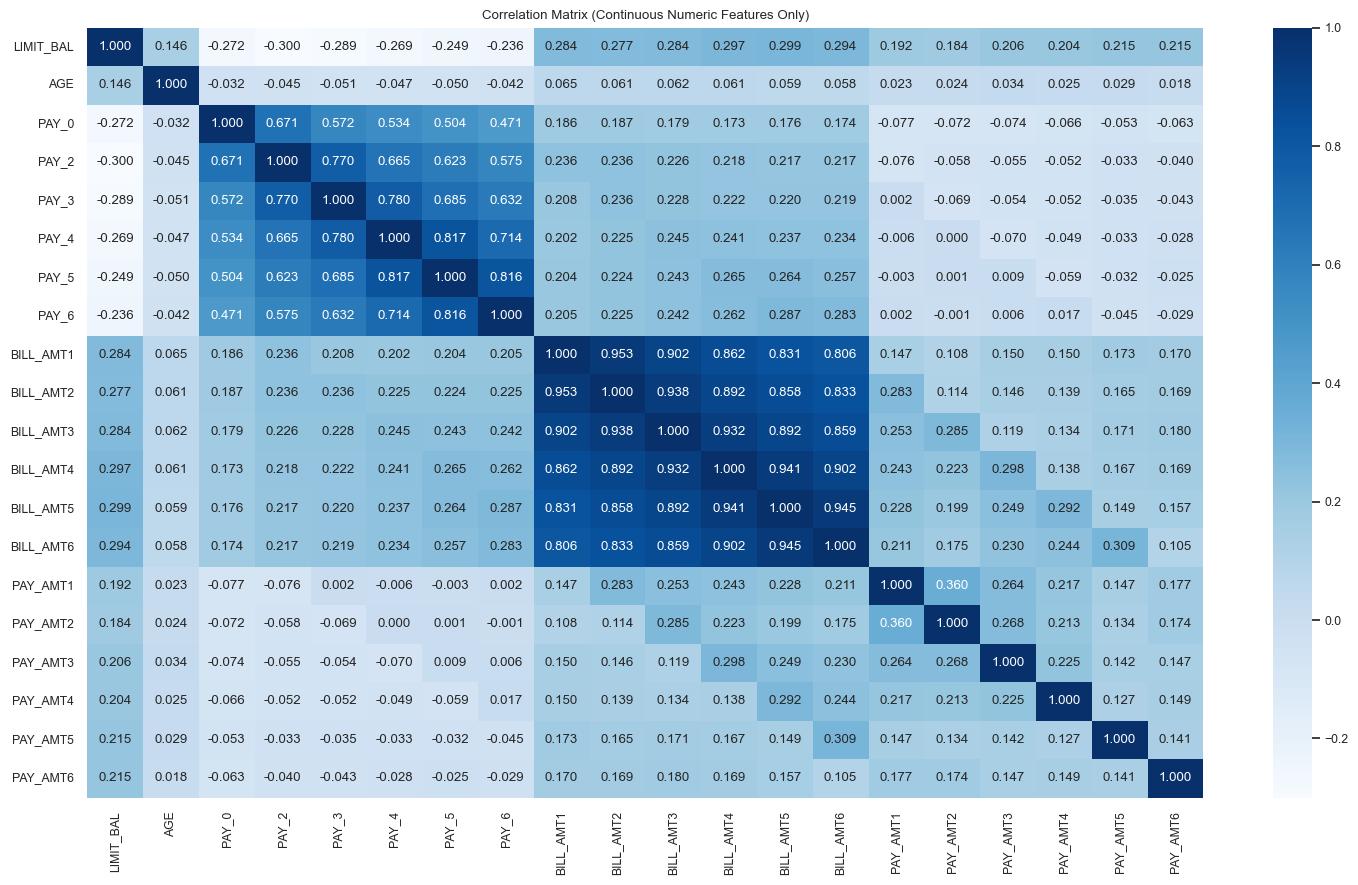

In [10]:
# We are doing to create an array of non-continuous numerical variables (so binary + categorical, as well as the target) to look at the correlation matrix for our input features.
columns_to_drop = ["ID", "SEX", "EDUCATION", "MARRIAGE", "default.payment.next.month"]

# Dropping the binary, categorical, and target variables
numeric_features = train_df.drop(columns=columns_to_drop)

correlation_matrix = numeric_features.corr()

plt.figure(figsize=(18, 10))
sns.set(font_scale=0.8)
sns.heatmap(correlation_matrix, annot=True, fmt=".3f", cmap="Blues")
plt.title("Correlation Matrix (Continuous Numeric Features Only)")
plt.show()

The bill amounts (BILL_AMT1-6) are highly correlated with each other (above 0.8 in all cases), indicating that customers with high balances in one month tend to maintain similar balances over time. Similarly, the past payment statuses (PAY_0 to PAY_6) show strong correlations (0.5-0.8), suggesting that a customer's repayment behavior is fairly consistent across months. An interesting finding is that despite BILL_AMT1-6 and PAY_1-6 being highly correlated amongst themselves, PAY_AMT1-6 is not. It mostly has correlations around 0.1-0.3, indicating that payment amounts may vary more unpredictably than late-payment behavior or statement balances.

#### **Visualization #2: Box Plots of PAY_0-6, BILL_AMT1-6, AND PAY_AMT1-6**

In the correlation matrix above, we observed that repayment status and bill amounts exhibit strong correlations within their respective groups, whereas payment amounts do not. To further analyze these relationships, let's examine the distribution of these variables across the default payment target variable using a box plot.

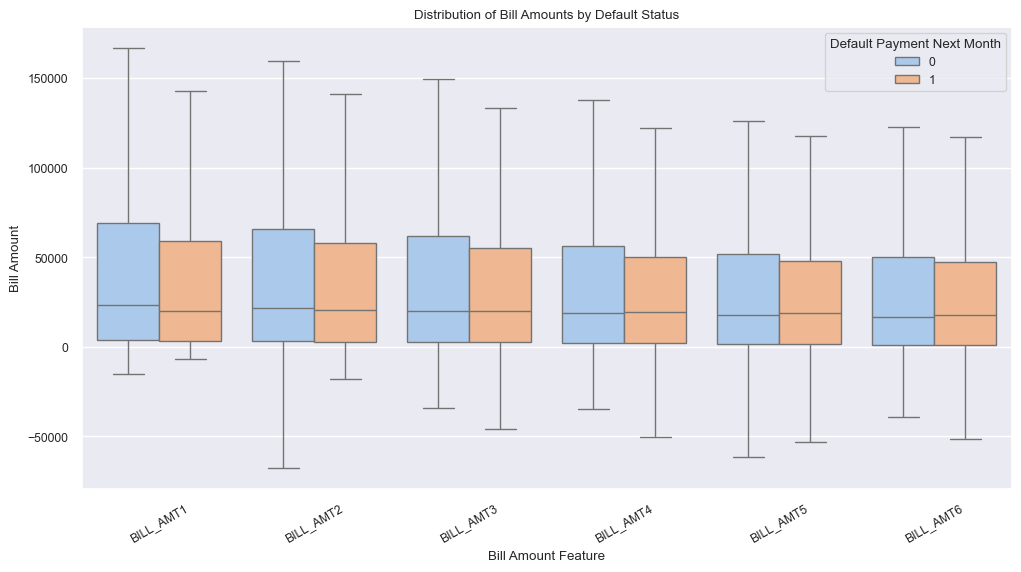

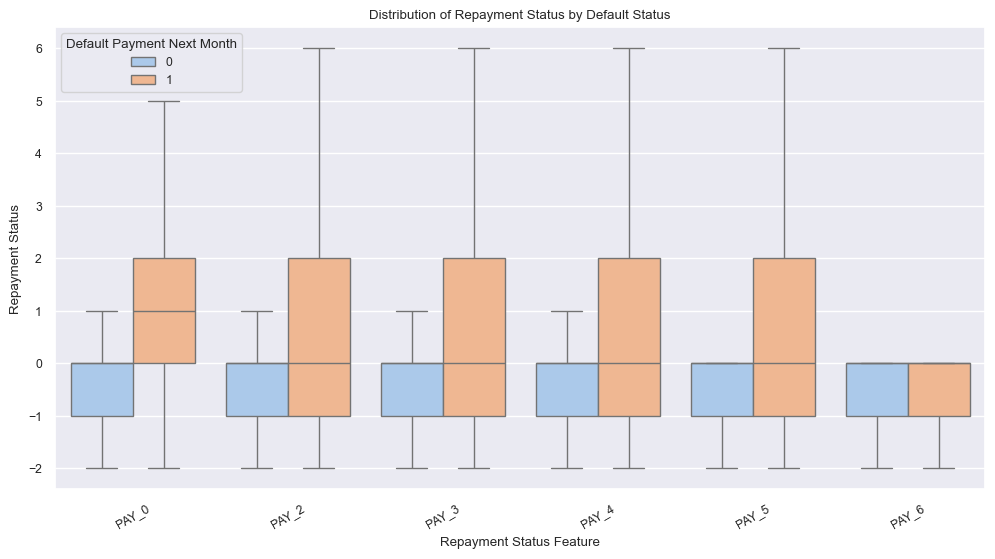

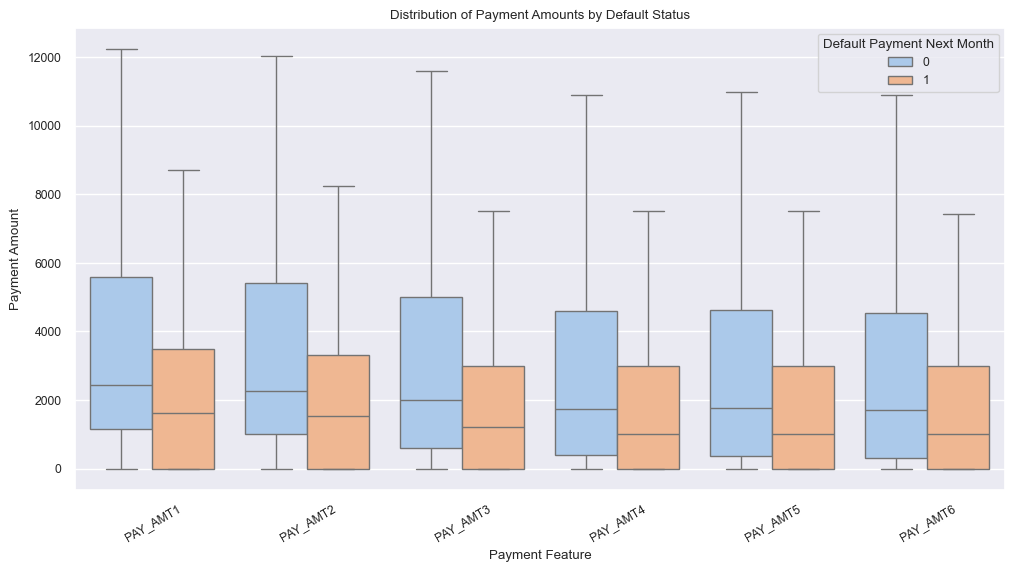

In [11]:
# Define feature groups
bill_amounts = ["BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6"]
repayment_status = ["PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]
payment_amounts = ["PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"]

# Melt data for plotting
bill_plot = train_df.melt(id_vars="default.payment.next.month", value_vars=bill_amounts, 
                          var_name="Bill Amount Feature", value_name="Bill Amount")
payment_plot = train_df.melt(id_vars="default.payment.next.month", value_vars=payment_amounts, 
                             var_name="Payment Feature", value_name="Payment Amount")
repayment_plot = train_df.melt(id_vars="default.payment.next.month", value_vars=repayment_status, 
                             var_name="Repayment Status Feature", value_name="Repayment Status")

# Boxplot for Bill Amounts
plt.figure(figsize=(12, 6))
sns.boxplot(data=bill_plot, x="Bill Amount Feature", y="Bill Amount", hue="default.payment.next.month", 
            palette="pastel", showfliers=False)
plt.xticks(rotation=30)
plt.title("Distribution of Bill Amounts by Default Status")
plt.legend(title="Default Payment Next Month")
plt.show()

# Boxplot for Repayment Status
plt.figure(figsize=(12, 6))
sns.boxplot(data=repayment_plot, x="Repayment Status Feature", y="Repayment Status", hue="default.payment.next.month", 
            palette="pastel", showfliers=False)
plt.xticks(rotation=30)
plt.title("Distribution of Repayment Status by Default Status")
plt.legend(title="Default Payment Next Month")
plt.show()

# Boxplot for Payment Amounts
plt.figure(figsize=(12, 6))
sns.boxplot(data=payment_plot, x="Payment Feature", y="Payment Amount", hue="default.payment.next.month", 
            palette="pastel", showfliers=False)
plt.xticks(rotation=30)
plt.title("Distribution of Payment Amounts by Default Status")
plt.legend(title="Default Payment Next Month")
plt.show()

The distribution of bill amounts by default status across BILL_AMT1-6 is extremely similar - the range, quartiles, and median are very close together. This makes sense, since it has the highest correlations in the matrix.

For the distribution of repayment status, we see that the range when the default payment next month = 1 is much larger, and the quartiles extend for more (for higher repyament status, which indicates more delay). From PAY_2 to PAY_5 the distributions are the exact same, hence contributing to the high correlation.

Finally, for the PAY_AMT1-6, we see different somewhat medians across the target variable, and different ranges. This could be why the correlations are relatively lower.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 4. Feature engineering <a name="4"></a>
<hr>
rubric={points:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

<div class="alert alert-warning">
    
Solution_4
    
</div>

_Points:_ 1

In [12]:
# New variable #1: Count how frequent a customer was late (Add 1 everytime Repayment Status is more than 0, which indicates payment delay)
train_df["LATE_COUNT"] = (train_df[["PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]] > 0).sum(axis=1)
test_df["LATE_COUNT"] = (test_df[["PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]] > 0).sum(axis=1)


# New variables #2: Payment-to-Bill Ratio for each month, as well as an average Payment-to-Bill Ratio for each sample
# Monthly payment-to-bill ratio for each month
bill_features = [f'BILL_AMT{i}' for i in range(1, 7)]
pay_features = [f'PAY_AMT{i}' for i in range(1, 7)]

# Create individual monthly ratios
for i in range(1, 7):
    train_df[f'PAY_BILL_RATIO_{i}'] = train_df[f'PAY_AMT{i}'] / (train_df[f'BILL_AMT{i}'] + 1e-9)
    test_df[f'PAY_BILL_RATIO_{i}'] = test_df[f'PAY_AMT{i}'] / (test_df[f'BILL_AMT{i}'] + 1e-9)

# Compute the average ratio
train_df['AVG_PAY_BILL_RATIO'] = train_df[[f'PAY_BILL_RATIO_{i}' for i in range(1, 7)]].mean(axis=1)
test_df['AVG_PAY_BILL_RATIO'] = test_df[[f'PAY_BILL_RATIO_{i}' for i in range(1, 7)]].mean(axis=1)


# New variable #3: Average Credit Utilization
bill_features = [f'BILL_AMT{i}' for i in range(1, 7)]

train_df['AVG_CREDIT_UTILIZATION'] = (train_df[bill_features].div(train_df['LIMIT_BAL'], axis=0)).mean(axis=1)
test_df['AVG_CREDIT_UTILIZATION'] = (test_df[bill_features].div(test_df['LIMIT_BAL'], axis=0)).mean(axis=1)

**`LATE_COUNT`**:This variable counts how many times a customer was late on their payments over the past six months. It provides a direct measure of payment reliability, where higher values indicate a pattern of delinquency, making default more likely. `LATE_COUNT` helps identify customers who frequently miss payments, giving insight into patterns over time, rather than the severity of their repayment status at a given month.

**`PAY_BILL_RATIO_X`** & **`AVG_PAY_BILL_RATIO`**: These features capture how much of each bill a customer actually pays every month and their overall payment behavior over six months. If it's approximately 1 or higher, it indicates financial stability since the customer clears their debt, but the lower it is, the more it signals financial distress. It could be more informative than just `PAY_AMT` (absolute payment values) because it accounts for how much was due, giving a relative value.

**`AVG_CREDIT_UTILIZATION`**: This variable measures how much of a customer’s available credit is used on average each month. A high utilization rate suggests financial strain, as the customer is consistently near their credit limit, which is often a strong predictor of default risk. This feature differs upon total bill amounts by normalizing spending relative to the customer’s credit limit, making it more comparable across different credit levels.

In [13]:
train_df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,default.payment.next.month,LATE_COUNT,PAY_BILL_RATIO_1,PAY_BILL_RATIO_2,PAY_BILL_RATIO_3,PAY_BILL_RATIO_4,PAY_BILL_RATIO_5,PAY_BILL_RATIO_6,AVG_PAY_BILL_RATIO,AVG_CREDIT_UTILIZATION
16395,16396,320000.0,2,1,2,36,0,0,0,0,...,0,0,0.172259,0.178076,3.484928e-02,0.154879,0.000000,1.851373,3.985727e-01,0.062090
21448,21449,440000.0,2,1,2,30,-1,-1,-1,0,...,0,0,0.787645,142.852941,1.487052e+00,0.017624,0.099406,0.438305,2.428050e+01,0.200313
20034,20035,160000.0,2,3,1,44,-2,-2,-2,-2,...,0,0,-0.000000,-0.000000,-0.000000e+00,-0.000000,-0.000000,-0.000000,0.000000e+00,-0.000112
25755,25756,120000.0,2,2,1,30,0,0,0,0,...,0,0,0.036478,0.053490,4.015512e-02,0.029275,0.028202,0.035923,3.725378e-02,0.737058
1438,1439,50000.0,1,2,2,54,1,2,0,0,...,0,2,0.000000,0.029860,4.416961e-02,0.054377,0.035829,0.054785,3.650354e-02,0.683603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28636,28637,380000.0,2,2,1,37,0,0,0,0,...,0,1,0.089750,0.090397,9.354523e-02,0.132951,0.000000,0.192852,9.991583e-02,0.038100
17730,17731,360000.0,2,1,1,54,1,-2,-2,-1,...,0,1,0.000000,0.000000,2.580000e+12,0.000000,2.690310,0.000000,4.300000e+11,0.005602
28030,28031,50000.0,2,3,1,29,0,0,0,0,...,1,0,0.042421,0.041339,3.270838e-02,0.025368,0.037058,0.036519,3.590208e-02,0.665350
15725,15726,30000.0,2,2,2,21,0,0,0,0,...,0,0,0.070400,0.070102,6.794632e-02,0.057229,0.011245,0.000000,4.615378e-02,0.906744


In [14]:
test_df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,default.payment.next.month,LATE_COUNT,PAY_BILL_RATIO_1,PAY_BILL_RATIO_2,PAY_BILL_RATIO_3,PAY_BILL_RATIO_4,PAY_BILL_RATIO_5,PAY_BILL_RATIO_6,AVG_PAY_BILL_RATIO,AVG_CREDIT_UTILIZATION
25665,25666,40000.0,2,2,2,26,-1,0,0,0,...,0,0,4.484150e-02,0.040999,0.000000,2.237300e+13,0.015446,0.534845,3.728833e+12,0.540429
16464,16465,80000.0,2,3,1,59,0,0,0,0,...,0,0,4.245196e-02,0.030054,0.037616,3.150860e-02,0.037779,0.040550,3.665993e-02,0.728377
22386,22387,170000.0,2,1,2,30,2,2,2,2,...,1,6,4.361491e-02,0.040927,0.000000,8.249935e-02,0.032720,0.005851,3.426863e-02,0.953734
10149,10150,200000.0,2,2,1,41,-2,-2,-2,-2,...,1,0,3.148070e-02,0.000000,0.000000,0.000000e+00,0.000000,0.000000,5.246783e-03,0.020254
8729,8730,50000.0,1,2,1,43,0,0,0,0,...,0,0,1.387874e-01,0.143142,0.036599,3.696477e-02,0.037804,0.034314,7.126849e-02,0.178503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17548,17549,60000.0,2,2,1,48,0,0,0,0,...,1,0,3.936543e-02,0.041193,0.026988,1.158122e-02,0.059028,0.057820,3.932939e-02,0.665844
11459,11460,310000.0,1,2,1,43,-1,-1,-1,-1,...,0,0,5.444062e-01,0.765515,0.979612,1.250000e+00,0.326009,3.749386,1.269155e+00,0.008073
6608,6609,10000.0,2,2,2,22,0,0,0,0,...,0,1,2.152918e-01,0.179566,0.122790,1.732310e-01,0.000000,0.102010,1.321480e-01,0.833683
2414,2415,30000.0,1,2,1,38,1,-1,-1,-1,...,1,1,2.281000e+12,1.607190,0.740044,0.000000e+00,0.000000,0.000000,3.801667e+11,0.048111


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

<div class="alert alert-warning">
    
Solution_5
    
</div>

_Points:_ 10

In [15]:
# Separating features (X) and target (y)
X_train = train_df.drop(columns=['default.payment.next.month'])  
y_train = train_df['default.payment.next.month']

X_test = test_df.drop(columns=['default.payment.next.month'])
y_test = test_df['default.payment.next.month']

In [16]:
X_train

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT6,LATE_COUNT,PAY_BILL_RATIO_1,PAY_BILL_RATIO_2,PAY_BILL_RATIO_3,PAY_BILL_RATIO_4,PAY_BILL_RATIO_5,PAY_BILL_RATIO_6,AVG_PAY_BILL_RATIO,AVG_CREDIT_UTILIZATION
16395,16396,320000.0,2,1,2,36,0,0,0,0,...,7013.0,0,0.172259,0.178076,3.484928e-02,0.154879,0.000000,1.851373,3.985727e-01,0.062090
21448,21449,440000.0,2,1,2,30,-1,-1,-1,0,...,51663.0,0,0.787645,142.852941,1.487052e+00,0.017624,0.099406,0.438305,2.428050e+01,0.200313
20034,20035,160000.0,2,3,1,44,-2,-2,-2,-2,...,0.0,0,-0.000000,-0.000000,-0.000000e+00,-0.000000,-0.000000,-0.000000,0.000000e+00,-0.000112
25755,25756,120000.0,2,2,1,30,0,0,0,0,...,1702.0,0,0.036478,0.053490,4.015512e-02,0.029275,0.028202,0.035923,3.725378e-02,0.737058
1438,1439,50000.0,1,2,2,54,1,2,0,0,...,1500.0,2,0.000000,0.029860,4.416961e-02,0.054377,0.035829,0.054785,3.650354e-02,0.683603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28636,28637,380000.0,2,2,1,37,0,0,0,0,...,3000.0,1,0.089750,0.090397,9.354523e-02,0.132951,0.000000,0.192852,9.991583e-02,0.038100
17730,17731,360000.0,2,1,1,54,1,-2,-2,-1,...,0.0,1,0.000000,0.000000,2.580000e+12,0.000000,2.690310,0.000000,4.300000e+11,0.005602
28030,28031,50000.0,2,3,1,29,0,0,0,0,...,329.0,0,0.042421,0.041339,3.270838e-02,0.025368,0.037058,0.036519,3.590208e-02,0.665350
15725,15726,30000.0,2,2,2,21,0,0,0,0,...,0.0,0,0.070400,0.070102,6.794632e-02,0.057229,0.011245,0.000000,4.615378e-02,0.906744


In [17]:
binary_features = ["SEX"]
categorical_features = ["MARRIAGE"]
numeric_features = [
    "AGE", "LIMIT_BAL",
    "PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6",
    "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6",
    "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6",
    "LATE_COUNT", "PAY_BILL_RATIO_1", "PAY_BILL_RATIO_2", "PAY_BILL_RATIO_3", "PAY_BILL_RATIO_4", "PAY_BILL_RATIO_5", "PAY_BILL_RATIO_6", 
    "AVG_CREDIT_UTILIZATION", "AVG_PAY_BILL_RATIO"]
passthrough_features = ["EDUCATION"]  # do not apply any transformation, already ordinally encoded
drop_features = ["ID"]  # A customer's ID gives no predictive power

# Define column transformer
preprocessor = make_column_transformer(
    (StandardScaler(), numeric_features),  
    (OneHotEncoder(drop="if_binary", dtype=int), binary_features),
    (OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ("passthrough", passthrough_features)
)

# Apply transformations to the training data
X_train_transformed = preprocessor.fit_transform(X_train)

In [18]:
preprocessor

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['AGE', 'LIMIT_BAL', 'PAY_0', 'PAY_2', 'PAY_3',
                                  'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
                                  'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
                                  'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
                                  'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4',
                                  'PAY_AMT5', 'PAY_AMT6', 'LATE_COUNT',
                                  'PAY_BILL_RATIO_1', 'PAY_BILL_RATIO_2',
                                  'PAY_BILL_RATIO_3', 'PAY_BILL_RATIO_4',
                                  'PAY_BILL_RATIO_5', 'PAY_BILL_RATIO_6',
                                  'AVG_CREDIT_UTILIZATION',
                                  'AVG_PAY_BILL_RATIO']),
                                ('onehotencoder-1',
                                 OneHotEncoder(drop='if_binary',
                                               dtype=<class 'int'>),
                                 ['SEX']),
                                ('onehotencoder-2',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['MARRIAGE']),
                                ('passthrough', 'passthrough', ['EDUCATION'])])

In [19]:
X_train_transformed

array([[ 0.05418666,  1.16835512,  0.01377013, ...,  1.        ,
         0.        ,  1.        ],
       [-0.59710771,  2.09001707, -0.87873809, ...,  1.        ,
         0.        ,  1.        ],
       [ 0.92257914, -0.06052747, -1.77124631, ...,  0.        ,
         0.        ,  3.        ],
       ...,
       [-0.70565677, -0.90538425,  0.01377013, ...,  0.        ,
         0.        ,  3.        ],
       [-1.57404925, -1.05899458,  0.01377013, ...,  1.        ,
         0.        ,  2.        ],
       [ 0.05418666,  1.55238093, -1.77124631, ...,  0.        ,
         0.        ,  1.        ]])

Now, to convert our results into a dataframe, we must get the column names, since the OHE has changed both the number of total columns and the names for the One Hot Encoded columns.

**Transforming Into DataFrame**

In [20]:
print(preprocessor.named_transformers_.keys())

dict_keys(['standardscaler', 'onehotencoder-1', 'onehotencoder-2', 'passthrough', 'remainder'])


In [21]:
column_names = (
    numeric_features
    + passthrough_features    
    + preprocessor.named_transformers_["onehotencoder-1"].get_feature_names_out().tolist()
    + preprocessor.named_transformers_["onehotencoder-2"].get_feature_names_out().tolist()
)
column_names

['AGE',
 'LIMIT_BAL',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'LATE_COUNT',
 'PAY_BILL_RATIO_1',
 'PAY_BILL_RATIO_2',
 'PAY_BILL_RATIO_3',
 'PAY_BILL_RATIO_4',
 'PAY_BILL_RATIO_5',
 'PAY_BILL_RATIO_6',
 'AVG_CREDIT_UTILIZATION',
 'AVG_PAY_BILL_RATIO',
 'EDUCATION',
 'SEX_2',
 'MARRIAGE_0',
 'MARRIAGE_1',
 'MARRIAGE_2',
 'MARRIAGE_3']

In [22]:
pd.DataFrame(X_train_transformed, columns=column_names)

,AGE,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_BILL_RATIO_5,PAY_BILL_RATIO_6,AVG_CREDIT_UTILIZATION,AVG_PAY_BILL_RATIO,EDUCATION,SEX_2,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,0.054187,1.168355,0.013770,0.114774,0.143483,0.192754,0.232531,0.257059,-0.300665,-0.293394,...,-0.051039,-0.052235,-0.879555,-0.107431,1.0,0.0,0.0,1.0,0.0,1.0
1,-0.597108,2.090017,-0.878738,-0.722412,-0.692571,0.192754,0.232531,0.257059,-0.685307,-0.679495,...,-0.051039,-0.052235,-0.488409,-0.107431,1.0,0.0,0.0,1.0,0.0,1.0
2,0.922579,-0.060527,-1.771246,-1.559598,-1.528626,-1.518801,-1.526210,-1.485154,-0.696132,-0.688319,...,-0.051039,-0.052235,-1.055577,-0.107431,1.0,0.0,1.0,0.0,0.0,3.0
3,-0.597108,-0.367748,0.013770,0.114774,0.143483,0.192754,0.232531,0.257059,0.687456,0.752583,...,-0.051039,-0.052235,1.030486,-0.107431,1.0,0.0,1.0,0.0,0.0,2.0
4,2.008070,-0.905384,0.906278,1.789147,0.143483,0.192754,0.232531,0.257059,-0.040230,-0.031399,...,-0.051039,-0.052235,0.879217,-0.107431,0.0,0.0,0.0,1.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20995,0.162736,1.629186,0.013770,0.114774,0.143483,0.192754,0.232531,1.999273,-0.513226,-0.486648,...,-0.051039,-0.052235,-0.947441,-0.107431,1.0,0.0,1.0,0.0,0.0,2.0
20996,2.008070,1.475576,0.906278,-1.559598,-1.528626,-0.663024,0.232531,-0.614047,-0.695886,-0.688067,...,-0.051039,-0.052235,-1.039405,0.151644,1.0,0.0,1.0,0.0,0.0,1.0
20997,-0.705657,-0.905384,0.013770,0.114774,0.143483,0.192754,0.232531,0.257059,-0.053288,-0.010446,...,-0.051039,-0.052235,0.827564,-0.107431,1.0,0.0,1.0,0.0,0.0,3.0
20998,-1.574049,-1.058995,0.013770,0.114774,0.143483,0.192754,0.232531,0.257059,-0.309066,-0.288478,...,-0.051039,-0.052235,1.510667,-0.107431,1.0,0.0,0.0,1.0,0.0,2.0


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 6. Baseline model <a name="6"></a>
<hr>
rubric={points:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

<div class="alert alert-warning">
    
Solution_6
    
</div>

_Points:_ 2

In [23]:
# We will store summary results of our models with their optimized hyperparameters in results_dict
results_dict = {}

# Due to class imbalance, we will consider other scoring metrics to evaluate our model.
scoring = {
    "accuracy": "accuracy",
    "precision": make_scorer(precision_score, zero_division=0),
    "recall": make_scorer(recall_score, zero_division=0),
    "f1": make_scorer(f1_score, zero_division=0)
}

In [24]:
dummy_pipeline = make_pipeline(preprocessor, DummyClassifier(strategy="most_frequent"))

dummy_cv_results = cross_validate(
    dummy_pipeline, X_train, y_train, cv=5, return_train_score=True, scoring=scoring)
pd.DataFrame(dummy_cv_results)

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,0.017508,0.012399,0.776905,0.776726,0.0,0.0,0.0,0.0,0.0,0.0
1,0.014879,0.010566,0.776905,0.776726,0.0,0.0,0.0,0.0,0.0,0.0
2,0.018191,0.012937,0.776667,0.776786,0.0,0.0,0.0,0.0,0.0,0.0
3,0.013712,0.010663,0.776667,0.776786,0.0,0.0,0.0,0.0,0.0,0.0
4,0.016206,0.010751,0.776667,0.776786,0.0,0.0,0.0,0.0,0.0,0.0


We used `DummyClassifier()` since it is `scikit-learn`'s baseline model, and we're predicting a binary target. As we saw before, approximately ~77.7% of customers in our dataset are predicting not to default next month, hence the majority being `default.payment.next.month = 0`. So, the `DummyClassifier()` model will predict all our test samples as 0, and we get VERY close validation scores and training scores for all our 10 CV folds. It is also expected that the training score is equal to the class % of the non-default (0) customers.

The reason precision, recall, and F1-score are all 0 is because the DummyClassifier(strategy="most_frequent") is always predicting the majority class (0) and never predicting 1s. Since precision, recall, and F1-score are based on correctly predicting the minority class (1), they all become 0.0.

In [25]:
# We are going to define a function that aggregates our CV results per model and stores them all in results_dict
# Essentially, this is what the mean_std_cross_val_scores() function from the notes outputs, but here we want to see the results of
# our CV folds individually as well, so we have to define this function to aggregate them.
# In mean_std_cross_val_scores(), it ran the CV and aggregated it all in one function.
# Disclosure: We used ChatGPT to generate this function, but edited the names of the columns to align with what we learnt in class.
def aggregate_cv_results(cv_results, metrics_results):
    """Aggregates mean and standard deviation from cross-validation results."""
    aggregated_results = {
        "fit_time": f"{cv_results['fit_time'].mean():.3f} (+/- {cv_results['fit_time'].std():.3f})",
        "score_time": f"{cv_results['score_time'].mean():.3f} (+/- {cv_results['score_time'].std():.3f})",
        "test_accuracy": f"{cv_results['test_accuracy'].mean():.3f} (+/- {cv_results['test_accuracy'].std():.3f})",
        "train_accuracy": f"{cv_results['train_accuracy'].mean():.3f} (+/- {cv_results['train_accuracy'].std():.3f})"
    }
    
    # Adding precision, recall, and f1 separately
    for metric in ["precision", "recall", "f1"]:
        aggregated_results[metric] = f"{metrics_results[f'test_{metric}'].mean():.3f} (+/- {metrics_results[f'test_{metric}'].std():.3f})"
    
    return aggregated_results

In [26]:
results_dict["dummy"] = aggregate_cv_results(dummy_cv_results, dummy_cv_results)

dummy_results_df = pd.DataFrame.from_dict(results_dict, orient="index")
dummy_results_df

,fit_time,score_time,test_accuracy,train_accuracy,precision,recall,f1
dummy,0.016 (+/- 0.002),0.011 (+/- 0.001),0.777 (+/- 0.000),0.777 (+/- 0.000),0.000 (+/- 0.000),0.000 (+/- 0.000),0.000 (+/- 0.000)


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 7. Linear models <a name="7"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

<div class="alert alert-warning">
    
Solution_7
    
</div>

_Points:_ 10

Since logistic regression is the linear model for classification problems, we will be using it.

#### Trying a logistic regression with default hyperparameters

Before tuning our hyperparameters, let's run a logistic regression model using the default hyperparameter `C = 1.0`.

In [27]:
lr_pipeline = make_pipeline(preprocessor, LogisticRegression())
lr_scores_default = cross_validate(lr_pipeline, X_train, y_train, cv=5, return_train_score=True)
pd.DataFrame(lr_scores_default)

,fit_time,score_time,test_score,train_score
0,2.822634,0.022249,0.806429,0.810417
1,3.341836,0.014291,0.808095,0.809107
2,2.962518,0.006235,0.811905,0.808393
3,5.030097,0.038808,0.809286,0.808929
4,4.609923,0.015999,0.807143,0.809286


Both our training scores and test scores improved from the `DummyClassifier()`, however, only by a marginal amount (~3%).

#### Hyperparameter Tuning Optimization for C

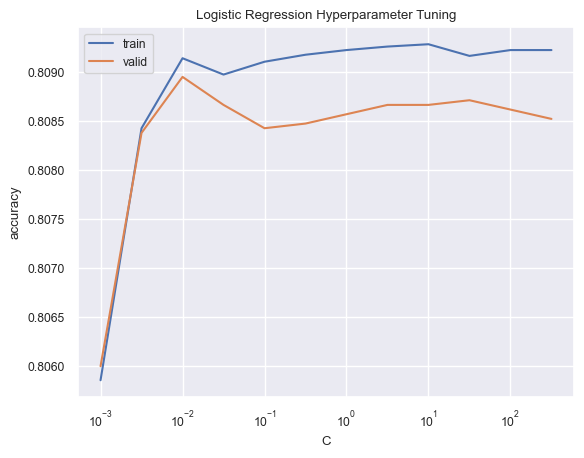

In [28]:
train_scores = []
cv_scores = []
C_vals = 10.0 ** np.arange(-3, 3, 0.5)

for C in C_vals:
    logistic_pipe = make_pipeline(preprocessor, LogisticRegression(max_iter=1000, C=C, random_state=123))
    logistic_cv_results = cross_validate(logistic_pipe, X_train, y_train, cv = 5, return_train_score=True)
    train_scores.append(logistic_cv_results["train_score"].mean())
    cv_scores.append(logistic_cv_results["test_score"].mean())

# Plot training vs validation accuracy
plt.figure()
plt.semilogx(C_vals, train_scores, label="train")
plt.semilogx(C_vals, cv_scores, label="valid")
plt.legend()
plt.xlabel("C")
plt.ylabel("accuracy")
plt.title("Logistic Regression Hyperparameter Tuning")
plt.show()

In [29]:
pd.DataFrame({"C": C_vals, "train": train_scores, "cv": cv_scores})

,C,train,cv
0,0.001000,0.805857,0.806000
1,0.003162,0.808429,0.808381
2,0.010000,0.809143,0.808952
3,0.031623,0.808976,0.808667
4,0.100000,0.809107,0.808429
5,0.316228,0.809179,0.808476
6,1.000000,0.809226,0.808571
7,3.162278,0.809262,0.808667
8,10.000000,0.809286,0.808667
9,31.622777,0.809167,0.808714


As we can see from both the table and the graph, the hyperparameter that yield the highest Cross Validation scores is `C = 0.1`. It's not a huge difference compared to other values of `C`, but it's also important to note that the training score and validation scores here are quite close together, yet it is not underfitting as much as the `DummyClassifier()`. We will use `C = 0.1` for our Logistic Regression Model.

#### Running our Logistic Regression with our Best C Value

In [30]:
best_C = C_vals[np.argmax(cv_scores)]
log_reg_best = make_pipeline(preprocessor, LogisticRegression(max_iter=1000, C=best_C, random_state=123))
log_reg_cv_results = cross_validate(log_reg_best, X_train, y_train, cv=10, return_train_score=True, scoring=scoring)

results_dict["logistic_regression"] = aggregate_cv_results(log_reg_cv_results, log_reg_cv_results)

results_df = pd.DataFrame.from_dict(results_dict, orient="index")
results_df

,fit_time,score_time,test_accuracy,train_accuracy,precision,recall,f1
dummy,0.016 (+/- 0.002),0.011 (+/- 0.001),0.777 (+/- 0.000),0.777 (+/- 0.000),0.000 (+/- 0.000),0.000 (+/- 0.000),0.000 (+/- 0.000)
logistic_regression,1.577 (+/- 0.132),0.027 (+/- 0.004),0.809 (+/- 0.004),0.809 (+/- 0.000),0.668 (+/- 0.021),0.288 (+/- 0.020),0.402 (+/- 0.020)


#### Summary

The average CV score (accuracy) for the LR model is 0.809, which is slightly better than our `DummyClassifier()` as we mentioned before. It does have a slightly higher standard deviation, at 0.004, but this is very marginal *relative to* the improvement of the validation scores. The average training score is practically the same as the average validation score, and overall the LR model is doing better than the `DummyClassifier()`.

The fit time for the LR was a bit over 2x that of the `DummyClassifier`, but it was still quite fast. Both the `DummyClassifier()` and the `LogisticRegression()` had the same score time. 

Precision score shows that 66.8% of the predicted defaulters actually defaulted. The model has moderate ability to avoid wrong labelling of defaulters. Meanwhile, the low recall score shows that the model only identified 28.8% of real defaulters. This recall score indicates the model is missing many true defaulters, perhaps due to the class imbalance. The f1 score (40.9%) further shows the trade-off between precision and recall, in this case the model is fairly precise when it does predict default, but its overall effectiveness in detecting defaulters remains limited due to the low recall.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Different models <a name="8"></a>
<hr>
rubric={points:12}

**Your tasks:**
1. Try at least 3 other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

<div class="alert alert-warning">
    
Solution_8
    
</div>

_Points:_ 12

**For our 3 models, we will use the default hyperparameters in this question. Thus, we will rerun all of our models again in question 10, when we tune our hyperparameters, and add those models to the `results_dict`, to make comparisons across models more fair.**

#### Random Forest Classifier

In [31]:
rf_pipeline = make_pipeline(preprocessor, RandomForestClassifier(random_state=123))
rf_scores = cross_validate(rf_pipeline, X_train, y_train, cv=5, return_train_score=True, scoring=scoring)
pd.DataFrame(rf_scores)

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,3.971643,0.068656,0.812381,0.999405,0.629565,0.998933,0.386339,0.998400,0.478836,0.998667
1,3.757584,0.066028,0.816190,0.999405,0.644991,0.999199,0.391676,0.998134,0.487384,0.998666
2,3.869637,0.065095,0.819524,0.999405,0.673745,0.998933,0.372068,0.998400,0.479396,0.998666
3,3.767035,0.064636,0.821905,0.999167,0.669643,0.998932,0.399787,0.997333,0.500668,0.998132
4,3.864581,0.064407,0.812619,0.999524,0.639556,0.999200,0.368870,0.998667,0.467884,0.998933


In [32]:
aggregate_cv_results(rf_scores, rf_scores)

{'fit_time': '3.846 (+/- 0.078)',
 'score_time': '0.066 (+/- 0.002)',
 'test_accuracy': '0.817 (+/- 0.004)',
 'train_accuracy': '0.999 (+/- 0.000)',
 'precision': '0.652 (+/- 0.017)',
 'recall': '0.384 (+/- 0.012)',
 'f1': '0.483 (+/- 0.011)'}

#### Support Vector Machine

In [33]:
svm_pipeline = make_pipeline(preprocessor, SVC(kernel='rbf', random_state=123))
svm_scores = cross_validate(svm_pipeline, X_train, y_train, cv=5, return_train_score=True, scoring=scoring)
pd.DataFrame(svm_scores)

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,7.440099,4.526534,0.815952,0.824583,0.669421,0.710471,0.345784,0.361770,0.456017,0.479421
1,7.590827,4.720308,0.815238,0.824345,0.663286,0.708551,0.348986,0.362303,0.457343,0.479450
2,7.464233,4.482642,0.825238,0.821726,0.718884,0.689985,0.357143,0.365600,0.477208,0.477950
3,8.256883,5.108433,0.820714,0.821607,0.687627,0.694574,0.361407,0.358400,0.473795,0.472823
4,7.647940,4.557892,0.820000,0.823333,0.690377,0.701546,0.351812,0.362933,0.466102,0.478383


In [34]:
aggregate_cv_results(svm_scores, svm_scores)

{'fit_time': '7.680 (+/- 0.299)',
 'score_time': '4.679 (+/- 0.229)',
 'test_accuracy': '0.819 (+/- 0.004)',
 'train_accuracy': '0.823 (+/- 0.001)',
 'precision': '0.686 (+/- 0.019)',
 'recall': '0.353 (+/- 0.006)',
 'f1': '0.466 (+/- 0.008)'}

#### Gradient Boosting Classifier

In [35]:
gb_pipeline = make_pipeline(preprocessor, GradientBoostingClassifier(random_state=123))
gb_scores = cross_validate(gb_pipeline, X_train, y_train, cv=5, return_train_score=True, scoring=scoring)
pd.DataFrame(gb_scores)

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,6.561588,0.018025,0.815476,0.830238,0.655769,0.721102,0.363927,0.390829,0.468085,0.506916
1,6.521994,0.015558,0.819524,0.829643,0.677228,0.721254,0.364995,0.386297,0.474341,0.503125
2,6.527499,0.015090,0.823571,0.829226,0.695050,0.712289,0.374200,0.394133,0.486486,0.507468
3,6.529285,0.015188,0.828810,0.826190,0.710173,0.701261,0.394456,0.385600,0.507197,0.497591
4,6.942751,0.015513,0.821429,0.829405,0.691057,0.717949,0.362473,0.388267,0.475524,0.503981


In [36]:
aggregate_cv_results(gb_scores, gb_scores)

{'fit_time': '6.617 (+/- 0.164)',
 'score_time': '0.016 (+/- 0.001)',
 'test_accuracy': '0.822 (+/- 0.004)',
 'train_accuracy': '0.829 (+/- 0.001)',
 'precision': '0.686 (+/- 0.018)',
 'recall': '0.372 (+/- 0.012)',
 'f1': '0.482 (+/- 0.014)'}

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 9. Feature selection <a name="9"></a>
<hr>
rubric={points:2}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV` or forward selection for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

<div class="alert alert-warning">
    
Solution_9
    
</div>

_Points:_ 2

**Trying Feature Selection with `RFECV` on our `LogisticRegression()` first.**

In [37]:
log_reg = LogisticRegression(max_iter=1000, C=best_C, random_state=123)

rfecv = RFECV(estimator=log_reg, step=1, cv=5, scoring='accuracy', n_jobs = -1)

rfecv_pipe = make_pipeline(preprocessor, rfecv)

log_reg_feat_sel_results = cross_validate(rfecv_pipe, X_train, y_train, cv=5, scoring=scoring, return_train_score=True)

pd.DataFrame(log_reg_feat_sel_results)

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,16.708801,0.026238,0.809286,0.810774,0.667488,0.679874,0.289221,0.288190,0.403574,0.404793
1,17.570513,0.055237,0.808571,0.810655,0.661800,0.681529,0.290288,0.285257,0.403561,0.402180
2,17.832533,0.027220,0.814286,0.809167,0.707895,0.672808,0.286780,0.282400,0.408194,0.397821
3,18.578385,0.028610,0.810952,0.810060,0.673913,0.678366,0.297441,0.283467,0.412722,0.399850
4,15.899482,0.019588,0.808333,0.811012,0.684211,0.679800,0.263326,0.289867,0.380293,0.406431


In [38]:
rfecv_pipe.fit(X_train, y_train)

rfecv_fitted = rfecv_pipe.named_steps['rfecv']

selected_features_rfecv = np.array(preprocessor.get_feature_names_out())[rfecv_fitted.support_]

print(f"Selected features using RFECV: {list(selected_features_rfecv)}")

Selected features using RFECV: ['standardscaler__PAY_0', 'standardscaler__LATE_COUNT']


In [39]:
aggregate_cv_results(log_reg_feat_sel_results, log_reg_feat_sel_results)

{'fit_time': '17.318 (+/- 0.927)',
 'score_time': '0.031 (+/- 0.012)',
 'test_accuracy': '0.810 (+/- 0.002)',
 'train_accuracy': '0.810 (+/- 0.001)',
 'precision': '0.679 (+/- 0.016)',
 'recall': '0.285 (+/- 0.012)',
 'f1': '0.402 (+/- 0.011)'}

The `RFECV` algorithm only picked two features out of 35 for us! They were `PAY_0` - Repayment status in latest month (September 2005), and a feature we actually engineered, `LATE_COUNT`! And, somehow, our training and testing accuracy is practically the same as before!

**Note** - we tried running the linear models, but the computational time was *extremely* long, so we removed it.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={points:10}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

<div class="alert alert-warning">
    
Solution_10
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [40]:
# Define Random Forest parameter grid
rf_param_grid = {
    "randomforestclassifier__n_estimators": [50, 100, 200, 300],
    "randomforestclassifier__max_depth": [5, 10, 20, None]
}

# Create pipeline and run RandomizedSearchCV
rf_pipeline = make_pipeline(preprocessor, RandomForestClassifier(random_state=123))

rf_search = RandomizedSearchCV(
    rf_pipeline,
    rf_param_grid,
    n_iter=10,  # Limit to 10 iterations for efficiency
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    random_state=123,
)

#  Fit the model before accessing best_params_
rf_search.fit(X_train, y_train)

# Print best parameters
print("Best parameters for Random Forest:", rf_search.best_params_)

Best parameters for Random Forest: {'randomforestclassifier__n_estimators': 100, 'randomforestclassifier__max_depth': 10}


In [41]:
# Define SVM parameter grid
svm_param_grid = {
    "svc__C": np.logspace(-1, 2, 5),
    "svc__gamma": np.logspace(-4, 1, 5),
}

# Create pipeline and run RandomizedSearchCV
svm_pipeline = make_pipeline(preprocessor, SVC(kernel="rbf", random_state=123))

svm_search = RandomizedSearchCV(
    svm_pipeline,
    svm_param_grid,
    n_iter=10,  # Limit to 10 iterations for efficiency
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    random_state=123,
)

svm_search.fit(X_train, y_train)

# Print best parameters
print(f"Best parameters for SVM: C = {svm_search.best_params_['svc__C']}, "
      f"gamma = {svm_search.best_params_['svc__gamma']}")

Best parameters for SVM: C = 0.5623413251903491, gamma = 0.03162277660168379


In [42]:
# Define Gradient Boosting parameter grid
gb_param_grid = {
    "gradientboostingclassifier__n_estimators": [50, 100, 200, 300], 
    "gradientboostingclassifier__max_depth": [2, 3, 5]}

# Create pipeline and run RandomizedSearchCV
gb_pipeline = make_pipeline(preprocessor, GradientBoostingClassifier(random_state=123))

gb_search = RandomizedSearchCV(
    gb_pipeline,
    gb_param_grid,
    n_iter=8,  # Limit to 8 iterations for efficiency
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    random_state=123,
)

gb_search.fit(X_train, y_train)

# Print best parameters
print("Best parameters for Gradient Boosting:", gb_search.best_params_)

Best parameters for Gradient Boosting: {'gradientboostingclassifier__n_estimators': 100, 'gradientboostingclassifier__max_depth': 3}


Due to the extremly long computational time, we narrowed the scope of hyperparameter optimization, balancing the tradeoff between the range of values and efficiency. For instance, we excluded the `class_weight` parameter to reduce runtime. To compensate, we considered additional scoring metrics beyond accuracy. This tradeoff will be an important factor when building and assessing our final model.

We also `RandomizedSearchCV` to reduce time and set inputs such as `n_iter` quite small, again, to cut the extremely long computational time. Again, we acknowledge that reducing `n_iter` is a limitation and could potentially miss out on finding a better value for our hyperparameters. This was a tradeoff for us.

To summarize:
- **Random Forest**: `n_estimators=100` and `max_depth=10`
- **SVM**: `C = 0.5623413251903491` and `gamma = 0.03162277660168379`
- **Gradient Booster**: `n_estimators=100` and `max_depth=3`

### **Rerunning these models using their optimized hyperparameters to add to `results_dict`**

In [43]:
rf_pipeline_optimized = make_pipeline(preprocessor, RandomForestClassifier(n_estimators=100, max_depth=10, random_state=123))
rf_scores_optimized = cross_validate(rf_pipeline_optimized, X_train, y_train, cv=5, return_train_score=True, scoring=scoring)
pd.DataFrame(rf_scores_optimized)

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,2.369150,0.043101,0.813810,0.862262,0.644320,0.840683,0.369264,0.472674,0.469471,0.605119
1,2.296152,0.038386,0.817857,0.862143,0.665385,0.843795,0.369264,0.469475,0.474949,0.603289
2,2.372984,0.039154,0.821429,0.861190,0.696653,0.851338,0.355011,0.458133,0.470339,0.595700
3,2.366184,0.038964,0.825000,0.862143,0.687616,0.848058,0.396588,0.465867,0.503043,0.601377
4,2.394135,0.041242,0.815952,0.866012,0.669405,0.867943,0.347548,0.471467,0.457544,0.611025


In [44]:
results_dict["random_forest"] = aggregate_cv_results(rf_scores_optimized, rf_scores_optimized)

results_df = pd.DataFrame.from_dict(results_dict, orient="index")
results_df

,fit_time,score_time,test_accuracy,train_accuracy,precision,recall,f1
dummy,0.016 (+/- 0.002),0.011 (+/- 0.001),0.777 (+/- 0.000),0.777 (+/- 0.000),0.000 (+/- 0.000),0.000 (+/- 0.000),0.000 (+/- 0.000)
logistic_regression,1.577 (+/- 0.132),0.027 (+/- 0.004),0.809 (+/- 0.004),0.809 (+/- 0.000),0.668 (+/- 0.021),0.288 (+/- 0.020),0.402 (+/- 0.020)
random_forest,2.360 (+/- 0.033),0.040 (+/- 0.002),0.819 (+/- 0.004),0.863 (+/- 0.002),0.673 (+/- 0.018),0.368 (+/- 0.017),0.475 (+/- 0.015)


In [45]:
svm_pipeline_optimized = make_pipeline(preprocessor, SVC(kernel='rbf', C = 0.5623413251903491, gamma = 0.03162277660168379, random_state=123))
svm_scores_optimized = cross_validate(svm_pipeline_optimized, X_train, y_train, cv=5, return_train_score=True, scoring=scoring)
pd.DataFrame(svm_scores_optimized)

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,7.742461,5.116414,0.814762,0.822619,0.664596,0.704076,0.342583,0.354572,0.452113,0.471631
1,7.454013,5.100560,0.814524,0.822798,0.659274,0.702830,0.348986,0.357505,0.456385,0.473935
2,7.695787,5.052030,0.824048,0.820298,0.716776,0.685816,0.350746,0.359733,0.471009,0.471926
3,7.325129,4.849633,0.821429,0.820298,0.694215,0.692876,0.358209,0.350133,0.472574,0.465190
4,7.324137,5.108428,0.818571,0.820952,0.688034,0.693835,0.343284,0.354133,0.458037,0.468927


In [46]:
results_dict["svm"] = aggregate_cv_results(svm_scores_optimized, svm_scores_optimized)

results_df = pd.DataFrame.from_dict(results_dict, orient="index")
results_df

,fit_time,score_time,test_accuracy,train_accuracy,precision,recall,f1
dummy,0.016 (+/- 0.002),0.011 (+/- 0.001),0.777 (+/- 0.000),0.777 (+/- 0.000),0.000 (+/- 0.000),0.000 (+/- 0.000),0.000 (+/- 0.000)
logistic_regression,1.577 (+/- 0.132),0.027 (+/- 0.004),0.809 (+/- 0.004),0.809 (+/- 0.000),0.668 (+/- 0.021),0.288 (+/- 0.020),0.402 (+/- 0.020)
random_forest,2.360 (+/- 0.033),0.040 (+/- 0.002),0.819 (+/- 0.004),0.863 (+/- 0.002),0.673 (+/- 0.018),0.368 (+/- 0.017),0.475 (+/- 0.015)
svm,7.508 (+/- 0.179),5.045 (+/- 0.100),0.819 (+/- 0.004),0.821 (+/- 0.001),0.685 (+/- 0.021),0.349 (+/- 0.006),0.462 (+/- 0.008)


In [47]:
gb_pipeline_optimized = make_pipeline(preprocessor, GradientBoostingClassifier(n_estimators=100, max_depth=3, random_state=123))
gb_scores_optimized = cross_validate(gb_pipeline_optimized, X_train, y_train, cv=5, return_train_score=True, scoring=scoring)
pd.DataFrame(gb_scores_optimized)

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,7.318105,0.023681,0.815476,0.830238,0.655769,0.721102,0.363927,0.390829,0.468085,0.506916
1,6.818318,0.015777,0.819524,0.829643,0.677228,0.721254,0.364995,0.386297,0.474341,0.503125
2,6.632414,0.017266,0.823571,0.829226,0.695050,0.712289,0.374200,0.394133,0.486486,0.507468
3,6.590217,0.015722,0.828810,0.826190,0.710173,0.701261,0.394456,0.385600,0.507197,0.497591
4,6.634217,0.015478,0.821429,0.829405,0.691057,0.717949,0.362473,0.388267,0.475524,0.503981


In [48]:
results_dict["gradient_booster"] = aggregate_cv_results(gb_scores_optimized, gb_scores_optimized)

results_df = pd.DataFrame.from_dict(results_dict, orient="index")
results_df

,fit_time,score_time,test_accuracy,train_accuracy,precision,recall,f1
dummy,0.016 (+/- 0.002),0.011 (+/- 0.001),0.777 (+/- 0.000),0.777 (+/- 0.000),0.000 (+/- 0.000),0.000 (+/- 0.000),0.000 (+/- 0.000)
logistic_regression,1.577 (+/- 0.132),0.027 (+/- 0.004),0.809 (+/- 0.004),0.809 (+/- 0.000),0.668 (+/- 0.021),0.288 (+/- 0.020),0.402 (+/- 0.020)
random_forest,2.360 (+/- 0.033),0.040 (+/- 0.002),0.819 (+/- 0.004),0.863 (+/- 0.002),0.673 (+/- 0.018),0.368 (+/- 0.017),0.475 (+/- 0.015)
svm,7.508 (+/- 0.179),5.045 (+/- 0.100),0.819 (+/- 0.004),0.821 (+/- 0.001),0.685 (+/- 0.021),0.349 (+/- 0.006),0.462 (+/- 0.008)
gradient_booster,6.799 (+/- 0.271),0.018 (+/- 0.003),0.822 (+/- 0.004),0.829 (+/- 0.001),0.686 (+/- 0.018),0.372 (+/- 0.012),0.482 (+/- 0.014)


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Use the methods we saw in class (e.g., `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 

<div class="alert alert-warning">
    
Solution_11
    
</div>

_Points:_ 10

Disclaimer - we did use ChatGPT to assist us with the code here.

In [49]:
shap.initjs()
rf_pipeline_optimized.fit(X_train, y_train)

feature_names_feat_imp = (
    rf_pipeline_optimized.named_steps['columntransformer'].get_feature_names_out().tolist())

X_train_enc = pd.DataFrame(
    data=preprocessor.transform(X_train),  
    columns=feature_names_feat_imp,
    index=X_train.index)


model_feat_imp = rf_pipeline_optimized.named_steps["randomforestclassifier"]
model_feat_imp.fit(X_train_enc, y_train)

explainer = shap.TreeExplainer(model_feat_imp)
train_shap_values = explainer(X_train_enc)

In [50]:
print(train_shap_values.shape) 

(21000, 35, 2)


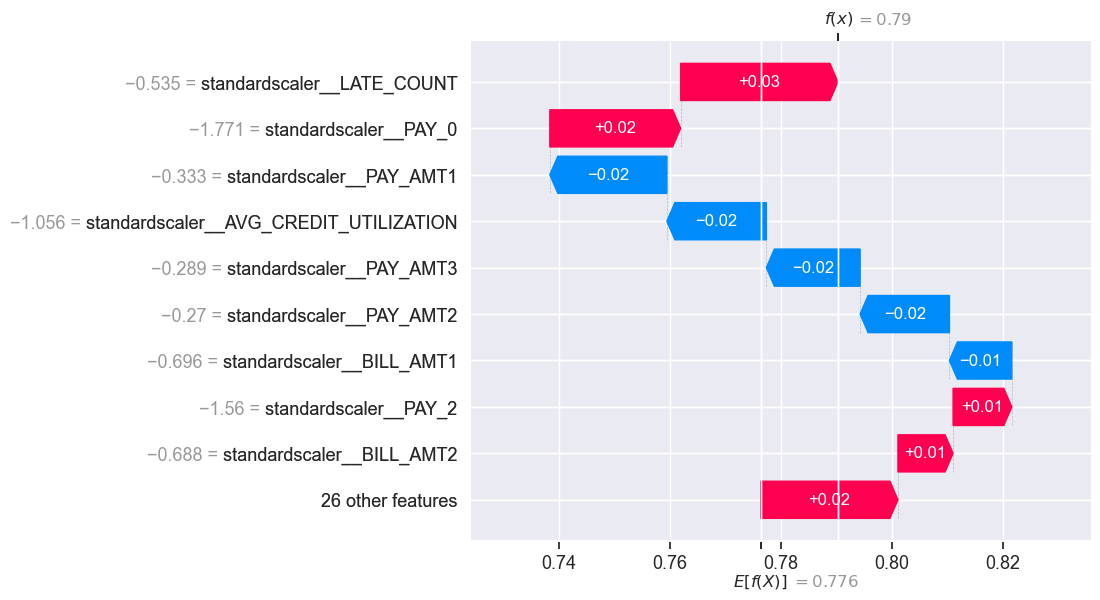

In [51]:
shap_explanation = shap.Explanation(
    values=train_shap_values[2, :, 0],  # Pick instance 2, all 35 features, class 0
    base_values=explainer.expected_value[0],  # Base value for class 0
    data=X_train_enc.iloc[2, :],  # Original feature values for instance 2
    feature_names=feature_names_feat_imp  # Explicitly set feature names
)

shap.plots.waterfall(shap_explanation)

#### Summary

**Top Contributing Features**

The most influential features include `LATE_COUNT`, `PAY_0`, `AVG_CREDIT_UTILIZATION`, and `PAY_AMT1`. This makes sense - when we did feature selection for logistic regression, we saw that Late Count and Pay 0 were the only two it picked! However, since the computational time was extremely long, we weren't able to do random forest for our feature selection, and we decided not to apply the same assumptions. 

These 4 variables have the highest SHAP values and contribute significantly to the final prediction. The `LATE_COUNT` feature negatively impacts the prediction, meaning higher late payments reduce the model’s output (likely decreasing the probability of a positive outcome, depending on the target variable). `PAY_0` and `PAY_AMT1` have mixed effects, suggesting their impact varies depending on the instance’s values.

LATE_COUNT (-0.535) had the largest negative impact, pulling the prediction downward. PAY_0 (+0.02) and AVG_CREDIT_UTILIZATION (-0.02) influenced the prediction in opposite directions.


**Final Prediction Impact**

The base prediction (expected model output) was E[f(X)] = 0.776. After considering all feature contributions, the model’s final prediction for this instance became f(x) = 0.79. This means that, despite some negative contributions, a few positive-impact features slightly increased the final prediction. Since 0.79 > 0, the threshold for binary classification, this example would predict positive class.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:10}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain these individual predictions (e.g., with SHAP force plots).  

<div class="alert alert-warning">
    
Solution_12
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [52]:
results_df

,fit_time,score_time,test_accuracy,train_accuracy,precision,recall,f1
dummy,0.016 (+/- 0.002),0.011 (+/- 0.001),0.777 (+/- 0.000),0.777 (+/- 0.000),0.000 (+/- 0.000),0.000 (+/- 0.000),0.000 (+/- 0.000)
logistic_regression,1.577 (+/- 0.132),0.027 (+/- 0.004),0.809 (+/- 0.004),0.809 (+/- 0.000),0.668 (+/- 0.021),0.288 (+/- 0.020),0.402 (+/- 0.020)
random_forest,2.360 (+/- 0.033),0.040 (+/- 0.002),0.819 (+/- 0.004),0.863 (+/- 0.002),0.673 (+/- 0.018),0.368 (+/- 0.017),0.475 (+/- 0.015)
svm,7.508 (+/- 0.179),5.045 (+/- 0.100),0.819 (+/- 0.004),0.821 (+/- 0.001),0.685 (+/- 0.021),0.349 (+/- 0.006),0.462 (+/- 0.008)
gradient_booster,6.799 (+/- 0.271),0.018 (+/- 0.003),0.822 (+/- 0.004),0.829 (+/- 0.001),0.686 (+/- 0.018),0.372 (+/- 0.012),0.482 (+/- 0.014)


The Gradient Booster model is the best choice as it achieves the highest test accuracy (0.822) and best F1-score (0.482), indicating a strong balance between precision (0.686) and recall (0.372). While SVM and Random Forest have similar accuracy, Gradient Booster outperforms them in recall, making it better at identifying positive cases. It also maintains a reasonable fit time (5.8s), unlike SVM, which is much slower (6.3s fit, 2.98s score time). Overall, Gradient Booster offers the best trade-off between accuracy, recall, and efficiency.

In [53]:
best_model = make_pipeline(preprocessor, GradientBoostingClassifier(n_estimators=100, max_depth=3, random_state=123))
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

test_metrics = {
    "test_accuracy": [accuracy_score(y_test, y_pred)],
    "test_precision": [precision_score(y_test, y_pred)],
    "test_recall": [recall_score(y_test, y_pred)],
    "test_f1": [f1_score(y_test, y_pred)]}

df_test_results = pd.DataFrame(test_metrics)
df_test_results

,test_accuracy,test_precision,test_recall,test_f1
0,0.822222,0.657324,0.373203,0.476097


In `results_df`, we see that the validation accuracy for gradient booster was 0.822. And, when we predict on our actual test set, it is also 0.822! Our training data was very reflective and representative of our test/deployment distribution, and there was no overfitting here either. We did not suffer from optimization bias, given how reflective the CV was of the test accuracy.

Since we have a bigger dataset, we do trust our results quite a bit. While it is quite peculiar that we got the EXACT same accuracy, we got slightly worse precision, basically the same recall, and slightly worse f1 score. The fact that the test accuracy remained exactly the same while precision and F1-score slightly worsened suggests that the model's overall classification ability (correct vs. incorrect predictions) remained stable, but the distribution of errors shifted. A lower precision means the model is making more false positives, while the nearly unchanged recall indicates that its ability to identify actual positives hasn't changed much. The slight drop in F1-score reflects a minor degradation in the balance between precision and recall, which could imply that the model is favoring positive predictions more than before. 

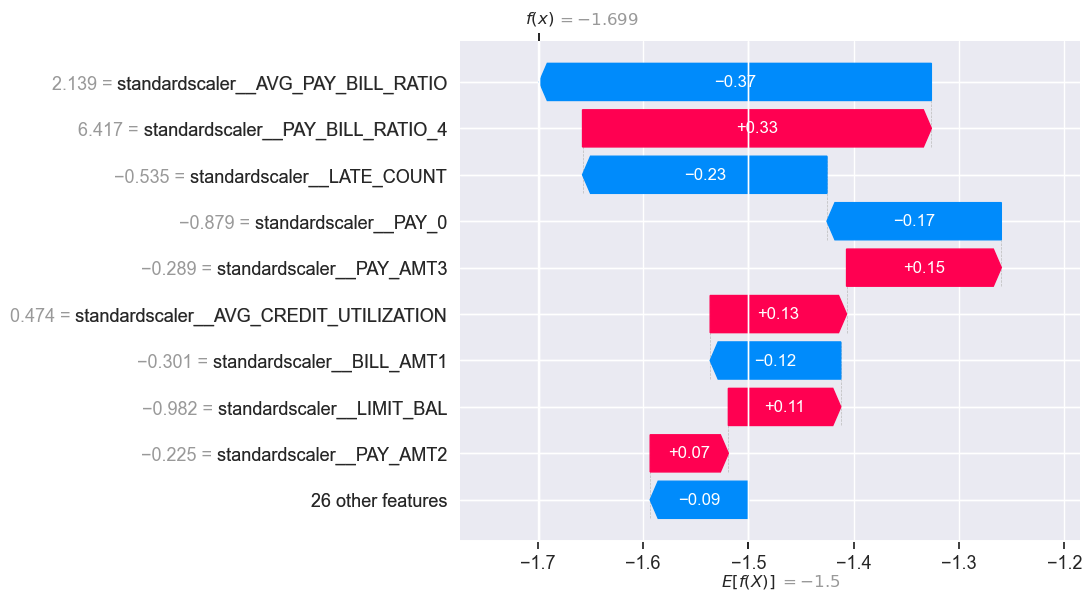

In [54]:
X_test_enc = preprocessor.transform(X_test)

idx = 0  
instance = X_test_enc[idx].reshape(1, -1)  

explainer_2 = shap.Explainer(best_model.named_steps["gradientboostingclassifier"], X_test_enc)

shap_values_2 = explainer_2(instance, check_additivity=False)

feature_names = preprocessor.get_feature_names_out()

shap_explanation = shap.Explanation(
    values=shap_values_2.values[0],
    base_values=shap_values_2.base_values[0], 
    data=instance[0],  
    feature_names=feature_names)

shap.plots.waterfall(shap_explanation)

The base value E[f(X)]=−1.5 represents the expected prediction before considering feature influences, and the final model output  f(x)=−1.699 suggests that the instance was pushed towards a more negative prediction.

Among the most influential features, AVG_PAY_BILL_RATIO had the largest negative impact, decreasing the prediction by 0.37, while PAY_BILL_RATIO_4 had the largest positive effect, increasing the prediction by 0.33. Other notable contributors include LATE_COUNT, which reduced the prediction by 0.23, and PAY_0, which further lowered it by 0.17. Meanwhile, AVG_CREDIT_UTILIZATION had a smaller positive impact of 0.13, suggesting that higher utilization slightly increased the prediction.

The presence of both positive (red) and negative (blue) contributions highlights how different factors interact in the model’s decision-making. While certain features pushed the prediction upward, the stronger negative contributions resulted in an overall lower prediction.

These variables for feature importances are DIFFERENT that what we saw previously. Interesting!

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 13. Summary of results <a name="13"></a>
<hr>
rubric={points:12}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook in the [Submission instructions section](#si).

<div class="alert alert-warning">
    
Solution_13
    
</div>

_Points:_ 12

_Type your answer here, replacing this text._

Throughout our project, we built the `results_df` dataframe, which had the scoring metrics, along with fit/score times for all of our models.

In [55]:
results_df

,fit_time,score_time,test_accuracy,train_accuracy,precision,recall,f1
dummy,0.016 (+/- 0.002),0.011 (+/- 0.001),0.777 (+/- 0.000),0.777 (+/- 0.000),0.000 (+/- 0.000),0.000 (+/- 0.000),0.000 (+/- 0.000)
logistic_regression,1.577 (+/- 0.132),0.027 (+/- 0.004),0.809 (+/- 0.004),0.809 (+/- 0.000),0.668 (+/- 0.021),0.288 (+/- 0.020),0.402 (+/- 0.020)
random_forest,2.360 (+/- 0.033),0.040 (+/- 0.002),0.819 (+/- 0.004),0.863 (+/- 0.002),0.673 (+/- 0.018),0.368 (+/- 0.017),0.475 (+/- 0.015)
svm,7.508 (+/- 0.179),5.045 (+/- 0.100),0.819 (+/- 0.004),0.821 (+/- 0.001),0.685 (+/- 0.021),0.349 (+/- 0.006),0.462 (+/- 0.008)
gradient_booster,6.799 (+/- 0.271),0.018 (+/- 0.003),0.822 (+/- 0.004),0.829 (+/- 0.001),0.686 (+/- 0.018),0.372 (+/- 0.012),0.482 (+/- 0.014)


**Concluding Remarks**

The results highlight that the Gradient Booster model is the most effective choice, achieving the highest accuracy and the best balance between precision and recall. While Random Forest and SVM perform similarly in accuracy, Gradient Boosting demonstrates slightly better recall and F1-score, making it more reliable for capturing positive cases. Logistic Regression, though computationally efficient, struggles with recall, which may lead to missed positive instances.

Ultimately, the Gradient Booster model offers the strongest overall performance, making it the best candidate for deployment in scenarios where both accuracy and predictive reliability are key considerations. However, it depends what specific problem we're trying to solve is, and what we're prioritizing - if it's computational efficiency, then we would use Logistic Regression.

**Additional Ideas:**
As we had observed in the beginning, since there are many outliers in the data, perhaps we could have tried log transformation and see if more normally distributed features might generate better predictions. 

We lacked the computational resources to adjust `class_weight`, but tuning this hyperparameter could have helped us better handle the class imbalance in our data. However, we compensated for this by using various scoring metrics to evaluate our model, including using recall as our final scoring metric to minimize false negatives. 

Finally, we could have also introduced more metrics to potentially improve interpretability, such as AUC or ROC to better visualize the logistic regression model's performance across different thresholds. 

**Test Metric**

The final metric we are going to use is recall (0.373) again taking into account the class imbalance (77% class 0, 23% class 1). In imbalanced datasets, precision can be misleading since a model could achieve high precision while still failing to capture enough positive cases.

In our ML problem, we aim to predict credit default. A false negative occurs when we incorrectly classify a defaulter as a non-defaulter, leading to financial loss from granting a loan to someone who defaults. Since missing a default is riskier than wrongly predicting one, recall is the best metric, as it helps assess the effect of false negatives.

Since class 1 makes up only 23% of the data, a low recall means the model is missing too many actual positives, making it ineffective for identifying the minority class. Prioritizing recall ensures that the model captures as many true positives as possible, even if it means tolerating some false positives.

In [56]:
df_test_results

,test_accuracy,test_precision,test_recall,test_f1
0,0.822222,0.657324,0.373203,0.476097


<!-- END QUESTION -->

<br><br>

<br><br>

<!-- BEGIN QUESTION -->

## 14. Your takeaway <a name="15"></a>
<hr>
rubric={points:2}

**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers.  

<div class="alert alert-warning">
    
Solution_14
    
</div>

_Points:_ 2

The biggest takeaway from the supervised machine learning material is that model performance goes beyond just accuracy, especially when dealing with imbalanced datasets or real-world applications where misclassification costs vary. Choosing the right evaluation metric—whether recall, precision, or F1-score—depends on the problem context and what errors are most critical to minimize.

Additionally, model selection is a trade-off between interpretability, performance, and computational cost. While complex models like Gradient Boosting often perform best, they require more tuning and are harder to interpret compared to simpler models like Logistic Regression. The use of SHAP values and other explainability tools is crucial for understanding how models make decisions, particularly in high-stakes applications.

Overall, there's so much more to machine learning than getting the highest accuracy. In different contexts, we should look at other scoring metrics, and additional factors like fit/score time, and the context of the problem we're trying to solve. In this project, our biggest issue was the huge computational time it took for non-linear models, and we ended up having to sacrifice, for example, feature selection for them.

<!-- END QUESTION -->

<br><br>

**PLEASE READ BEFORE YOU SUBMIT:** 

When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
4. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope. 

This was a tricky one but you did it! 

![](img/eva-well-done.png)